# Installing Needed Libraries


In [ ]:
# install needed libraries

!pip install nltk
!pip install spacy

!pip install numpy
!pip install pandas

!pip install matplotlib

!pip install wordcloud





# Imports

In [62]:


import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import string
import pandas as pd
import numpy as np
import spacy
import en_core_web_trf





[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yaraa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yaraa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yaraa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Importing the dataset

In [237]:


file_path = "C:/Users/yaraa/OneDrive/Desktop/NLP/project/Game_of_Thrones_Script.csv/Game_of_Thrones_Script.csv"


# Read the CSV file into a Pandas DataFrame
dataframe = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify it was read correctly
dataframe.head()


Release Date    Season    Episode     Episode Title          Name  \
0   2011-04-17  Season 1  Episode 1  Winter is Coming  waymar royce   
1   2011-04-17  Season 1  Episode 1  Winter is Coming          will   
2   2011-04-17  Season 1  Episode 1  Winter is Coming  waymar royce   
3   2011-04-17  Season 1  Episode 1  Winter is Coming          will   
4   2011-04-17  Season 1  Episode 1  Winter is Coming         gared   

                                            Sentence  
0  What do you expect? They're savages. One lot s...  
1  I've never seen wildlings do a thing like this...  
2                             How close did you get?  
3                            Close as any man would.  
4                   We should head back to the wall.

# Get most frequent Sentences

In [238]:
# get most frequent sentences and their counts

def get_most_frequent_sentences(dataframe, n):
    # Get the most frequent sentences
    most_frequent_sentences = dataframe['Sentence'].value_counts().head(n)
    return most_frequent_sentences.index.tolist(), most_frequent_sentences.values.tolist()




# display the top 100 most frequent sentences and their frequencies
    
most_frequent_sentences, most_frequent_sentence_counts = get_most_frequent_sentences(dataframe, 100)
print("Top 100 Most Frequent Sentences:")
for i in range(len(most_frequent_sentences)):
    print(f"{most_frequent_sentences[i]}: {most_frequent_sentence_counts[i]}")


Top 100 Most Frequent Sentences:
No.: 103
Your Grace.: 56
Why?: 52
What?: 44
Yes.: 40
Thank you.: 26
Who are you?: 24
What are you doing?: 24
And?: 23
What is it?: 20
Aye.: 20
Good.: 20
No!: 19
What do you want?: 16
Hodor.: 16
Who?: 14
My lord.: 13
Of course.: 13
I don't know.: 13
Oh.: 12
Why not?: 12
I do.: 12
I know.: 11
Where?: 11
What are you doing here?: 10
Come on.: 10
How?: 10
Come on!: 9
Yes, Your Grace.: 9
Valar morghulis.: 9
Please.: 9
Go on.: 9
Hmm.: 9
Yes, my lord.: 9
I can't.: 9
I did.: 9
Where are you going?: 9
Come in.: 8
Come.: 8
EPISODE: 8
Mmm.: 8
Never.: 8
Now!: 8
How many?: 8
Not yet.: 7
Ser Jaime.: 7
Don't.: 7
Hello.: 7
How do you know?: 7
What's your name?: 7
No, my lord.: 6
Nothing.: 6
I'm sorry.: 6
CREDITS: 6
Mm-hmm.: 6
My lady.: 6
Jon Snow.: 6
Open the gate!: 6
Long may he reign.: 6
Lord Baelish.: 6
For the night is dark and full of terrors.: 6
Go!: 6
What's this?: 6
I will.: 6
It is.: 6
Khaleesi.: 6
I am.: 5
Yeah.: 5
It doesn't matter.: 5
How do you know that?:

# Data Cleaning

In [239]:
# check for missing and null values
dataframe.isnull().sum()


Release Date     0
Season           0
Episode          0
Episode Title    0
Name             3
Sentence         1
dtype: int64

Dropping null values and unnecessary columns

In [240]:
# Drop the release date column
dataframe = dataframe.drop(columns=['Release Date'])


# Drop the rows with null values in the dataframe
dataframe = dataframe.dropna()

# check one more time for the missing values

dataframe.isnull().sum()


Season           0
Episode          0
Episode Title    0
Name             0
Sentence         0
dtype: int64

To Lowercase

In [241]:

dataframe['Sentence'] = dataframe['Sentence'].str.lower()
dataframe


Season    Episode     Episode Title              Name  \
0      Season 1  Episode 1  Winter is Coming      waymar royce   
1      Season 1  Episode 1  Winter is Coming              will   
2      Season 1  Episode 1  Winter is Coming      waymar royce   
3      Season 1  Episode 1  Winter is Coming              will   
4      Season 1  Episode 1  Winter is Coming             gared   
...         ...        ...               ...               ...   
23906  Season 8  Episode 6   The Iron Throne           brienne   
23907  Season 8  Episode 6   The Iron Throne             bronn   
23908  Season 8  Episode 6   The Iron Throne  tyrion lannister   
23909  Season 8  Episode 6   The Iron Throne               man   
23910  Season 8  Episode 6   The Iron Throne               all   

                                                Sentence  
0      what do you expect? they're savages. one lot s...  
1      i've never seen wildlings do a thing like this...  
2                                 how close did you get?  
3                                close as any man would.  
4                       we should head back to the wall.  
...                                                  ...  
23906  i think we can all agree that ships take prece...  
23907      i think that's a very presumptuous statement.  
23908  i once brought a jackass and a honeycomb into ...  
23909                            the queen in the north!  
23910  the queen in the north! the queen in the north...  

[23907 rows x 5 columns]

Expand Contractions

In [242]:
contractions = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "'d": " would",
    "'ll": " will",
    "'m": " am",
    "'re": " are",
    "'ve": " have",
    "n't": " not",
    "don't": "do not",
    "won't": "will not",
    "what's": "what is",
    "let's": "let us",
    "who's": "who is",
    "where's": "where is",
    "when's": "when is",
    "how's": "how is",
    "it's": "it is",
    "that's": "that is",
    "there's": "there is",
    "here's": "here is",
    "who'd": "who would",
    "he's": "he is",
    "he'd": "he would",
    "she's": "she is",
    "she'd": "she would",
    "it'd": "it would",
    "they're": "they are",
    "they'd": "they would",
    "we're": "we are",
    "we'd": "we would",
    "you're": "you are",
    "you'd": "you would",
    "i'm": "i am",
    "i'd": "i would",
    "i've": "i have",
    "i'll": "i will"
}

def expand_contraction(word):
    if word in contractions:
        return contractions[word]
    return word

def expand_contractions(word):
    for contraction in contractions:
         if contraction in word:
            #return contractions[contraction] # return the word without the contraction and return the contraction substitution
            return word.replace(contraction, contractions[contraction]) # if the word is not a contraction
        # just return it back since it is not a contraction
    
    return word

# apply the first function to the dataframe
dataframe['Sentence'] = dataframe['Sentence'].apply(lambda x: ' '.join(expand_contraction(word) for word in x.split()))

# apply the second function to the dataframe
dataframe['Sentence'] = dataframe['Sentence'].apply(lambda x: ' '.join(expand_contractions(word) for word in x.split()))


   


Remove Stop Words

In [243]:
# remove stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(sentence):
    if isinstance(sentence, str):
        return ' '.join([word for word in sentence.split() if word not in stop_words])
    else:
        return sentence
    
dataframe['Sentence'] = dataframe['Sentence'].apply(remove_stopwords)


Remove Punctuation

In [244]:
# remove punctuation

def remove_punctuation(sentence):
    if isinstance(sentence, str):
        return sentence.translate(str.maketrans('', '', string.punctuation))
    else:
        return sentence


dataframe['Sentence'] = dataframe['Sentence'].apply(remove_punctuation)


# Check for additional words that would not add meaning to the dataset

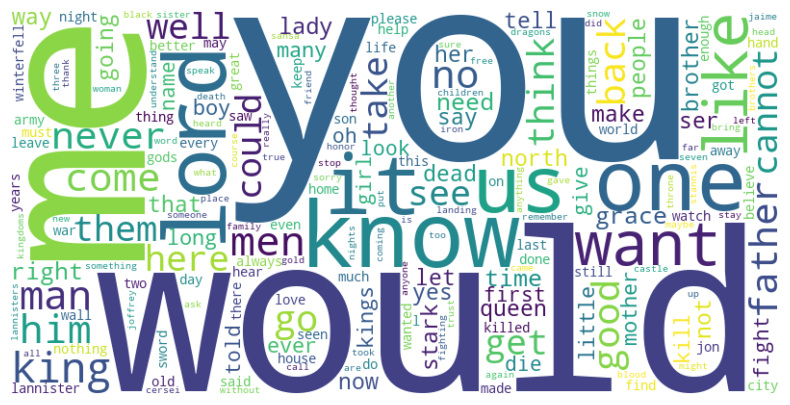

[('you', 1930), ('would', 1459), ('me', 1355), ('know', 1259), ('lord', 1108), ('one', 1092), ('it', 1052), ('us', 959), ('want', 886), ('like', 864), ('king', 805), ('men', 753), ('man', 734), ('no', 704), ('him', 701), ('come', 700), ('father', 667), ('good', 661), ('never', 656), ('go', 628), ('back', 625), ('think', 589), ('see', 571), ('get', 564), ('could', 560), ('cannot', 553), ('well', 540), ('them', 537), ('here', 533), ('take', 532)]


In [245]:
# check for top 30 most used words and display them in a word cloud
all_words = ' '.join(dataframe['Sentence'])

from collections import Counter
from wordcloud import WordCloud
counter = Counter(all_words.split())    

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(counter)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

print(counter.most_common(30))


In [246]:
# create a list with the words that i found in the code block above
words_to_remove = ['would', 'you','know','like', 'me','want', 'it', 'us', 'get','think','could','take','need','see','him','go','make','them','here','look','yes','no','going','thank']

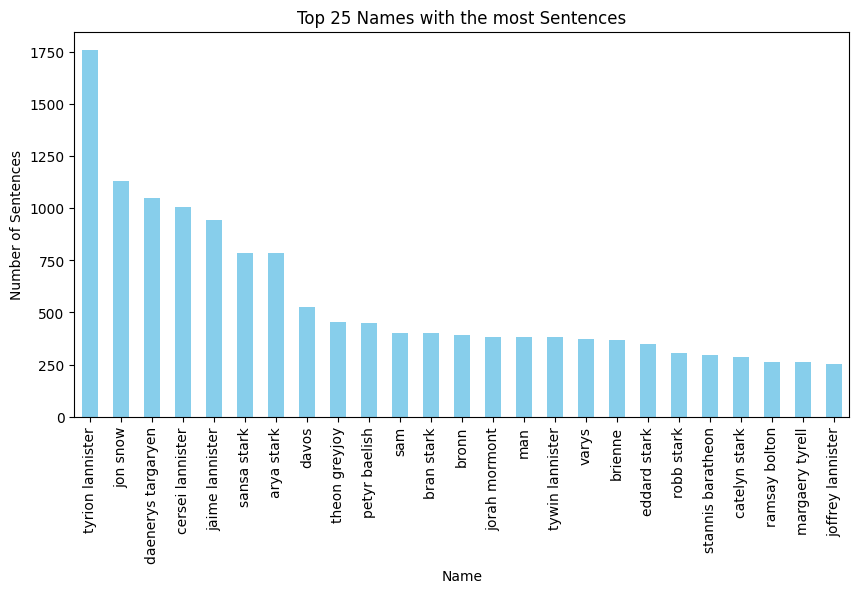

In [247]:
# get top 25 Names with the most Sentences

top_25_names = dataframe['Name'].value_counts().head(25)
top_25_names

# visulaize them in a plot

top_25_names.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Top 25 Names with the most Sentences')
plt.xlabel('Name')
plt.ylabel('Number of Sentences')
plt.show()



# Make the rest of the characters as one man

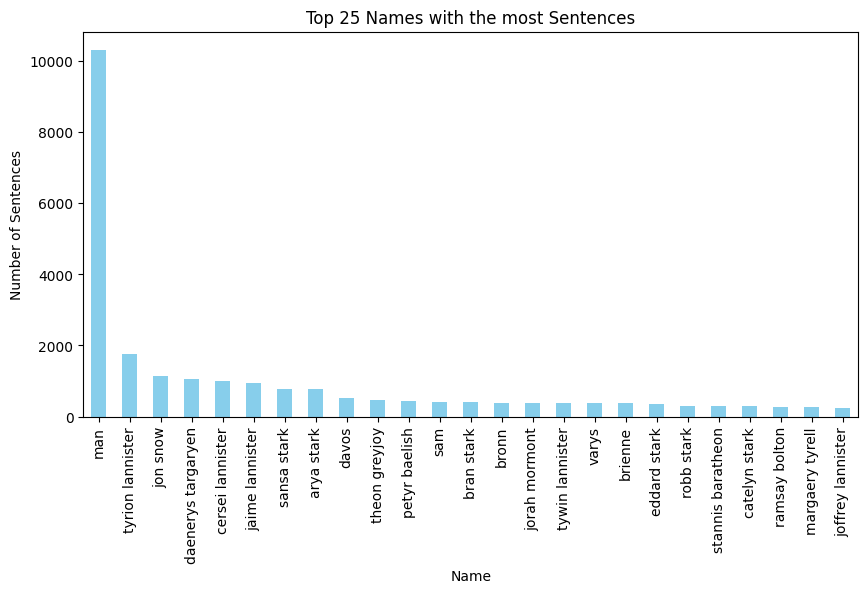

In [248]:
# Get the names after the top 25
names_to_change = dataframe['Name'].value_counts().index[25:]
names_to_change
# Change the names to "man"
dataframe.loc[dataframe['Name'].isin(names_to_change), 'Name'] = 'man'


# Get the top 25 names after the change

top_25_names = dataframe['Name'].value_counts().head(25)
top_25_names.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Top 25 Names with the most Sentences')
plt.xlabel('Name')
plt.ylabel('Number of Sentences')
plt.show()

# N-Grams

Bigrams

In [249]:
# get bigrams

from nltk import bigrams
from nltk import FreqDist

def get_bigrams(sentence):
    if isinstance(sentence, str):
        return list(bigrams(sentence.split()))
    else:
        return sentence
    
dataframe['Bigrams'] = dataframe['Sentence'].apply(get_bigrams)
# Transform lists of tuples into strings
dataframe['Bigrams'] = dataframe['Bigrams'].apply(lambda x: ' '.join(['_'.join(tup) for tup in x]))


In [250]:
# get top 50 bigrams and show all of them




bigrams = dataframe['Bigrams'].str.split(expand=True).stack().value_counts().head(50)
bigrams



kings_landing      197
come_on            125
nights_watch       122
jon_snow           121
seven_kingdoms     118
thank_you          113
let_us             102
no_no               96
castle_black        88
would_like          83
lord_commander      80
king_north          73
go_on               70
iron_throne         61
lord_light          58
casterly_rock       57
forgive_me          55
ser_davos           51
know_that           51
lord_baelish        50
come_back           50
tell_me             48
would_never         48
ned_stark           47
get_back            46
last_time           44
lady_sansa          44
like_that           44
lady_stark          44
hand_king           43
iron_islands        43
robb_stark          41
lord_stark          41
white_walkers       41
first_time          41
beyond_wall         41
first_men           41
would_say           40
thought_would       40
tywin_lannister     40
one_day             40
let_go              40
you_lord            39
go_back    

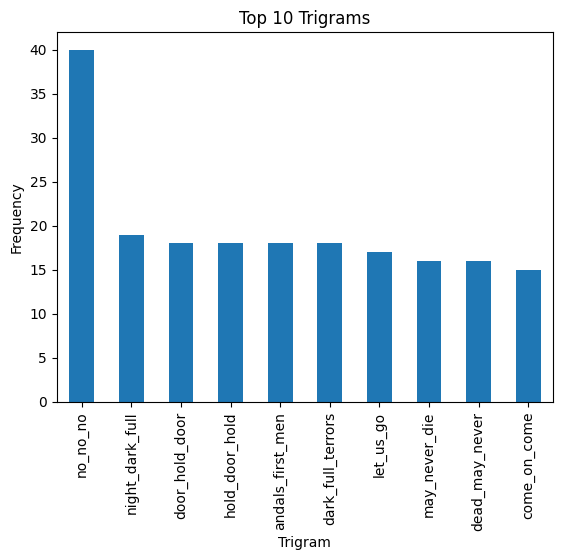

In [259]:
# get n-grams with n=3, n=4, n=5

from nltk import ngrams

def get_ngrams(sentence, n):
    if isinstance(sentence, str):
        return list(ngrams(sentence.split(), n))
    else:
        return sentence
    

dataframe['Trigrams'] = dataframe['Sentence'].apply(lambda x: get_ngrams(x, 3))
dataframe['Trigrams'] = dataframe['Trigrams'].apply(lambda x: ' '.join(['_'.join(tup) for tup in x]))

dataframe['Fourgrams'] = dataframe['Sentence'].apply(lambda x: get_ngrams(x, 4))
dataframe['Fourgrams'] = dataframe['Fourgrams'].apply(lambda x: ' '.join(['_'.join(tup) for tup in x]))

dataframe['Fivegrams'] = dataframe['Sentence'].apply(lambda x: get_ngrams(x, 5))

dataframe['Fivegrams'] = dataframe['Fivegrams'].apply(lambda x: ' '.join(['_'.join(tup) for tup in x]))


# get top 10 trigrams

trigrams = dataframe['Trigrams'].str.split(expand=True).stack().value_counts().head(10)
trigrams.plot(kind='bar')
plt.title('Top 10 Trigrams')
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.show()


Top Fourgrams

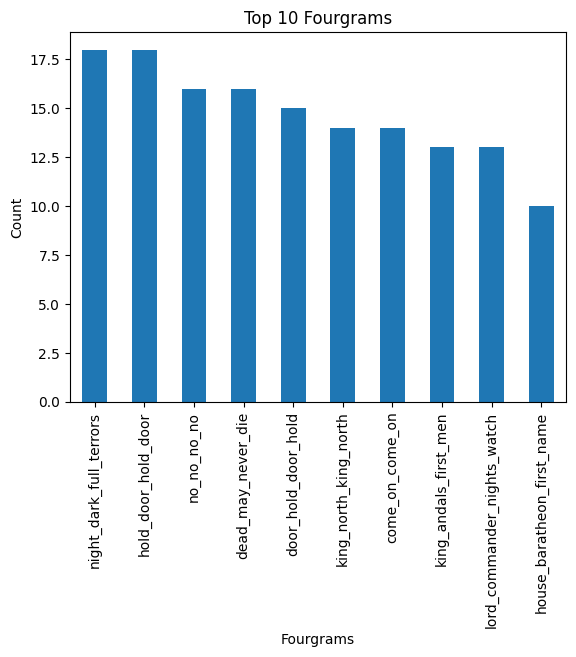

night_dark_full_terrors        18
hold_door_hold_door            18
no_no_no_no                    16
dead_may_never_die             16
door_hold_door_hold            15
king_north_king_north          14
come_on_come_on                14
king_andals_first_men          13
lord_commander_nights_watch    13
house_baratheon_first_name     10
Name: count, dtype: int64

In [257]:
# get top 10 fourgrams

fourgrams = dataframe['Fourgrams'].str.split(expand=True).stack().value_counts().head(10)
fourgrams.plot(kind='bar')
plt.xlabel('Fourgrams')
plt.ylabel('Count')
plt.title('Top 10 Fourgrams')
plt.show()
fourgrams

Top Fivegrams

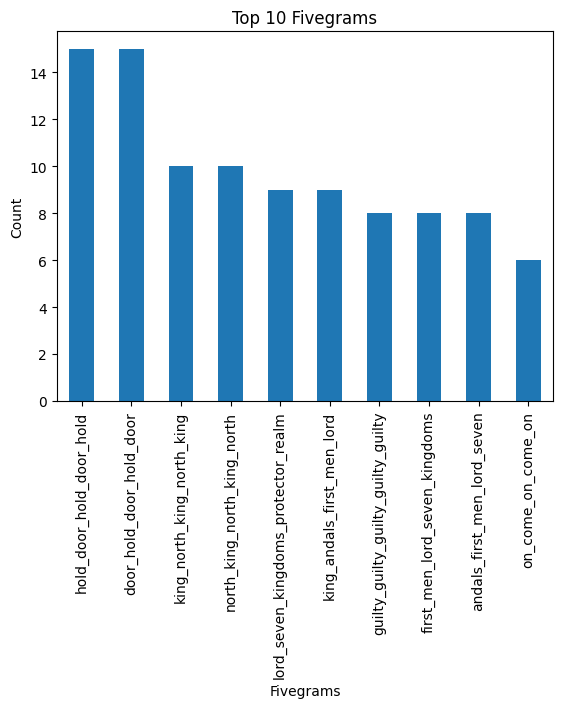

In [256]:
# get top 10 fivegrams

fivegrams = dataframe['Fivegrams'].str.split(expand=True).stack().value_counts().head(10)
fivegrams.plot(kind='bar')
plt.xlabel('Fivegrams')
plt.ylabel('Count')
plt.title('Top 10 Fivegrams')
plt.show()


# Create wordcloud for the top 25 characters

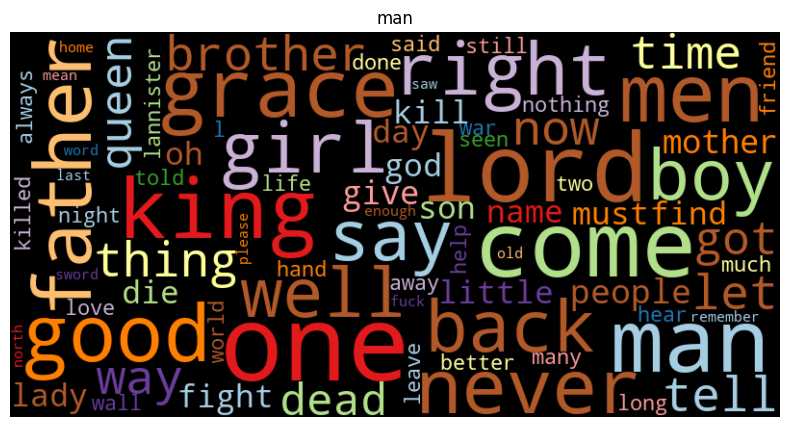

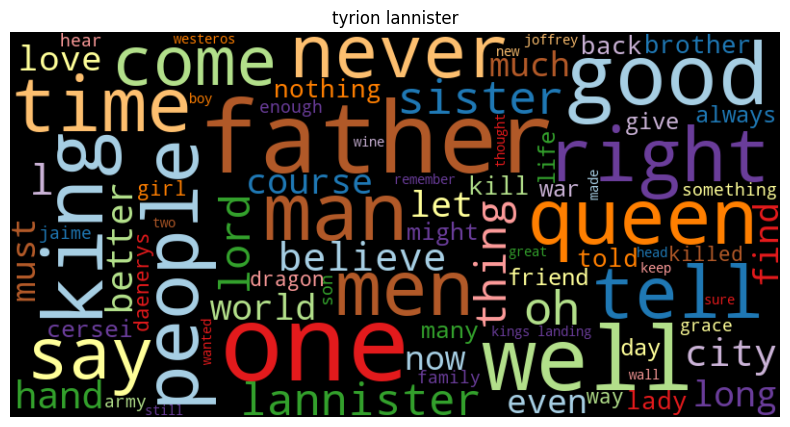

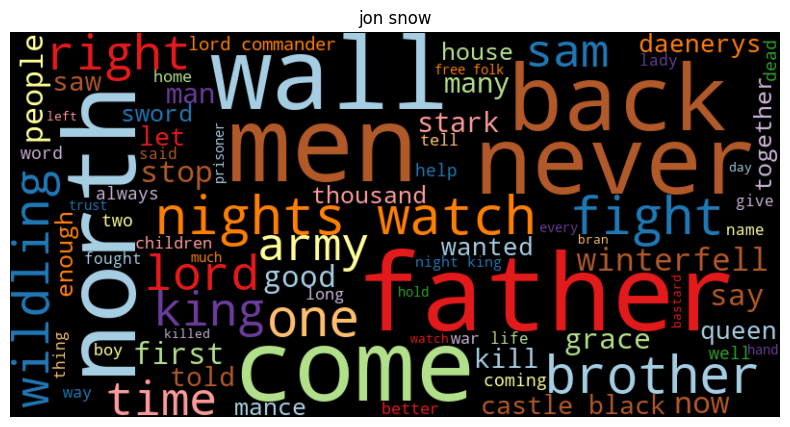

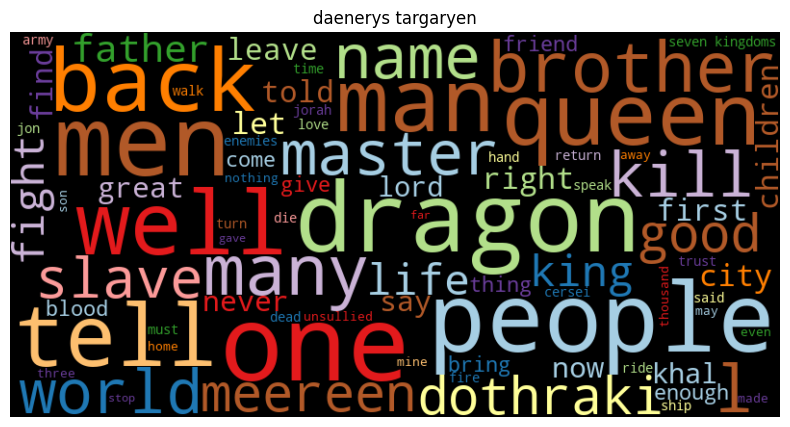

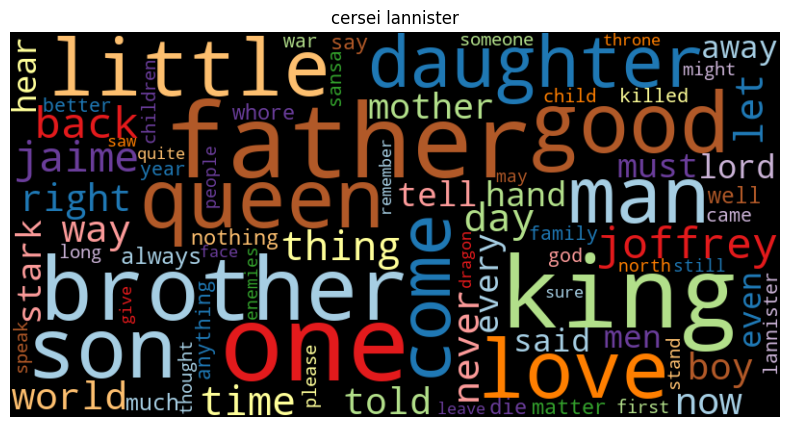

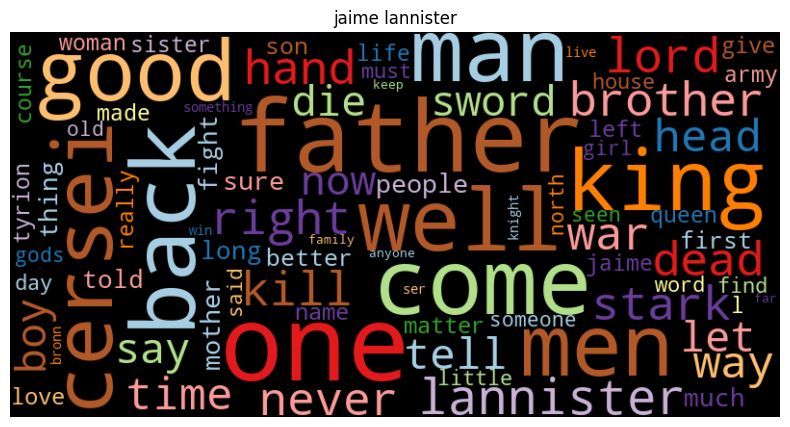

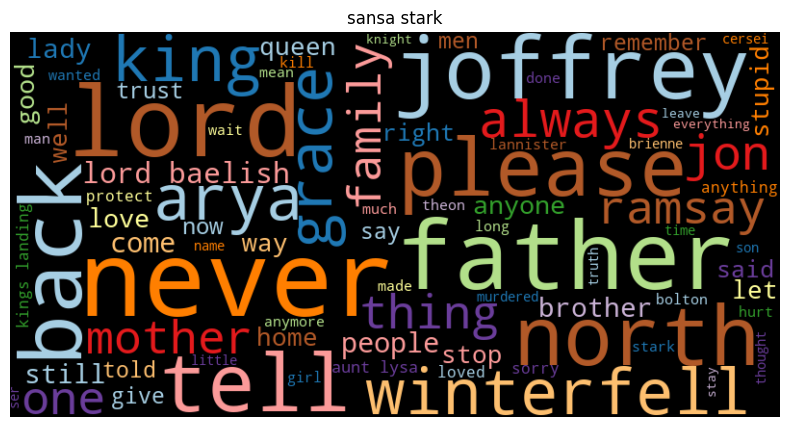

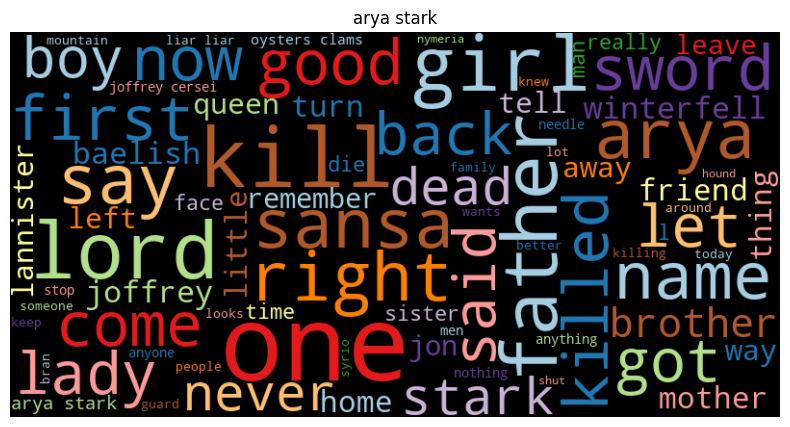

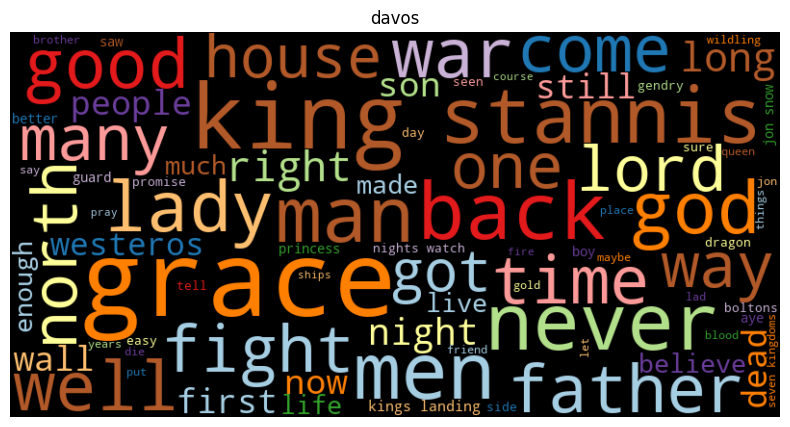

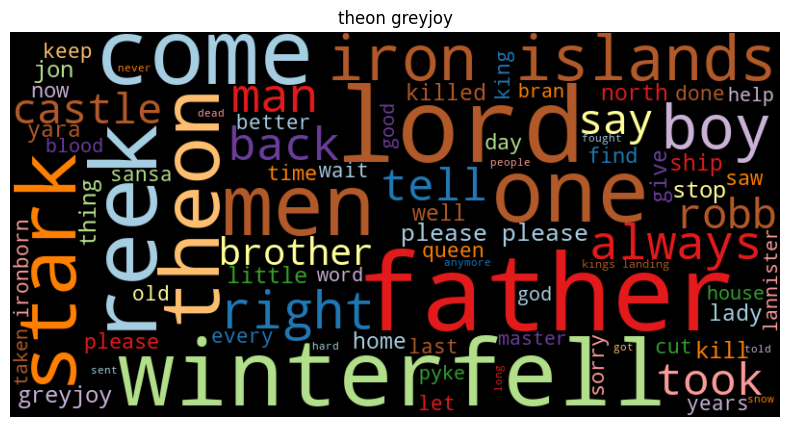

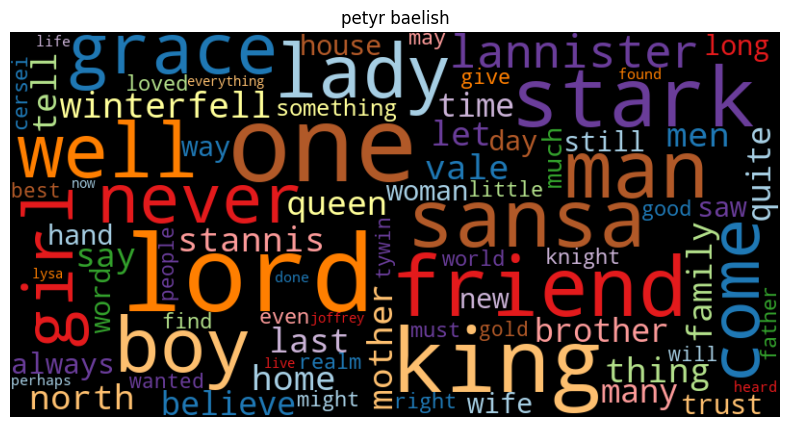

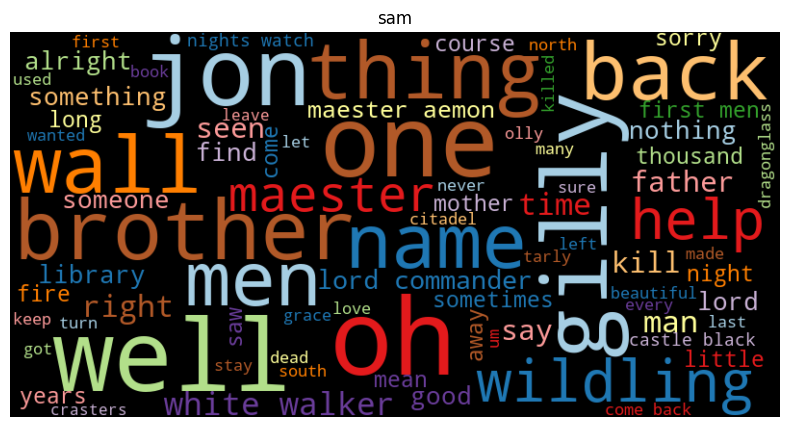

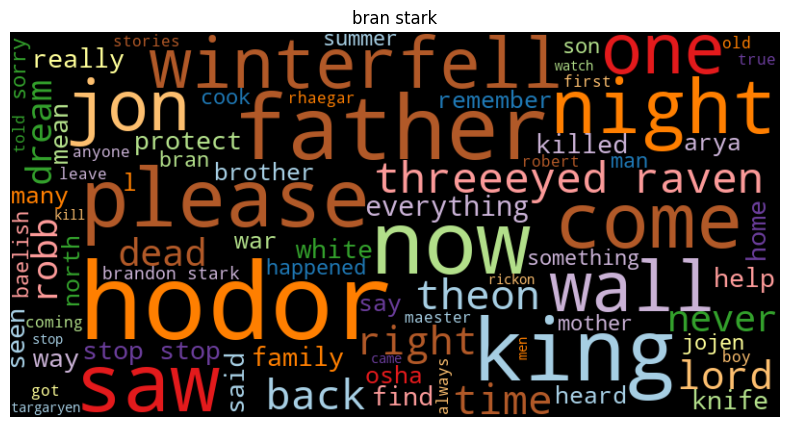

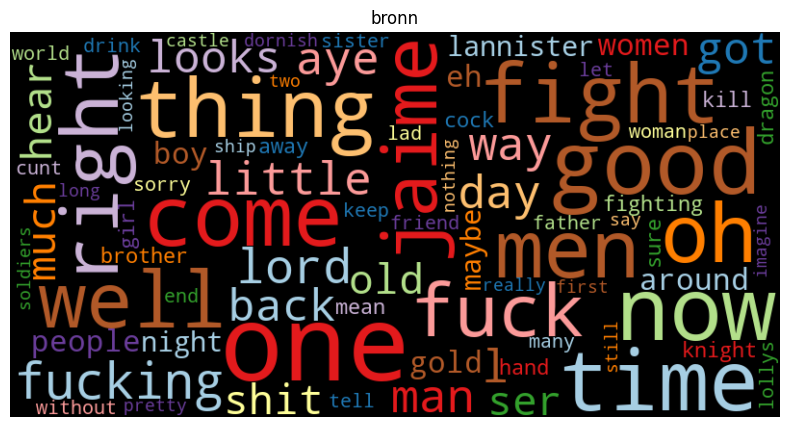

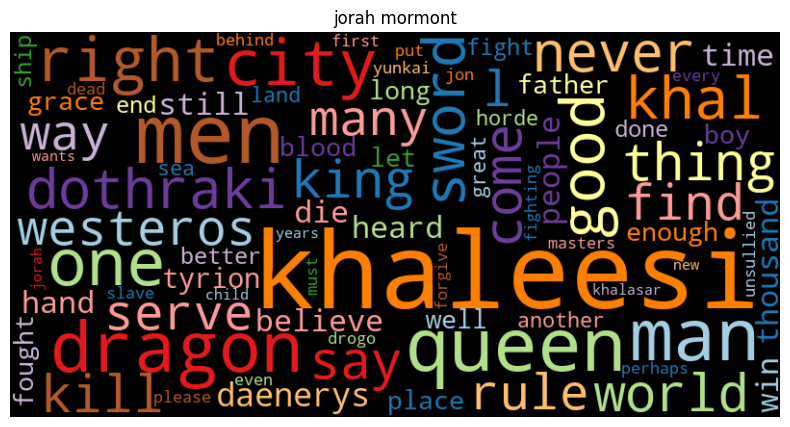

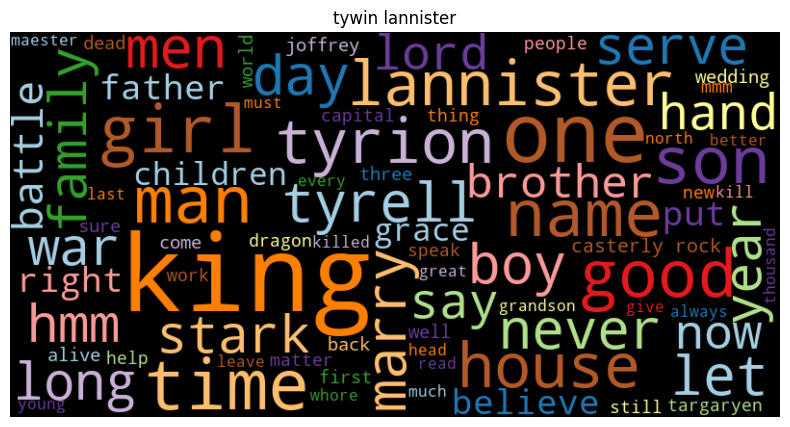

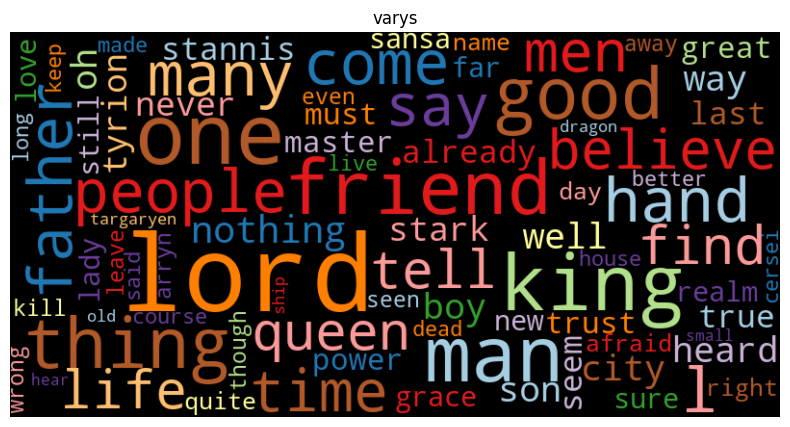

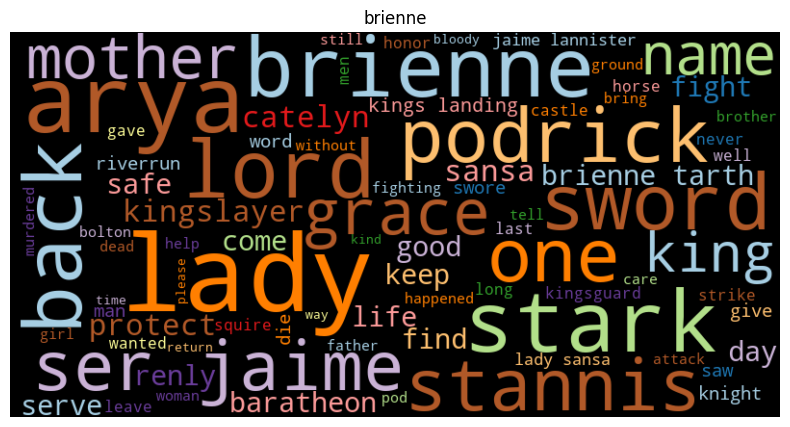

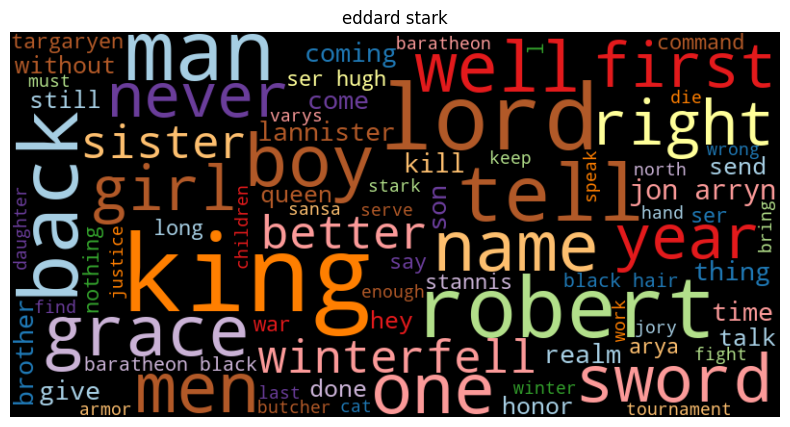

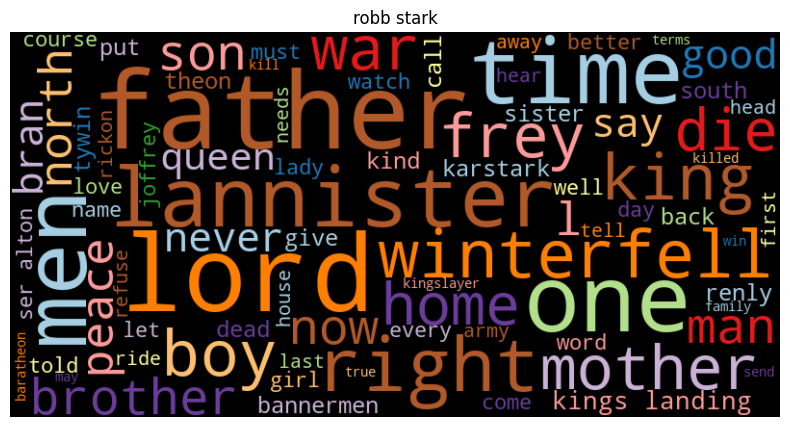

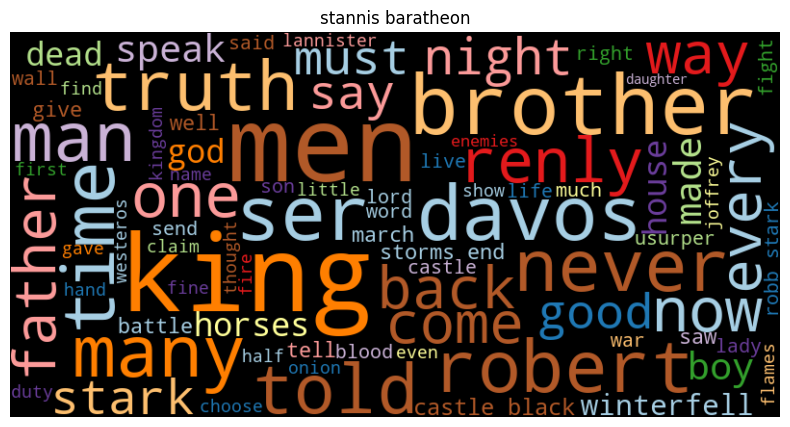

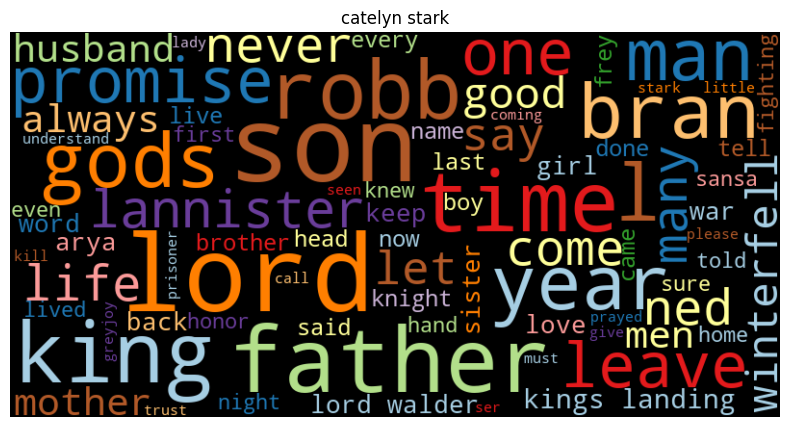

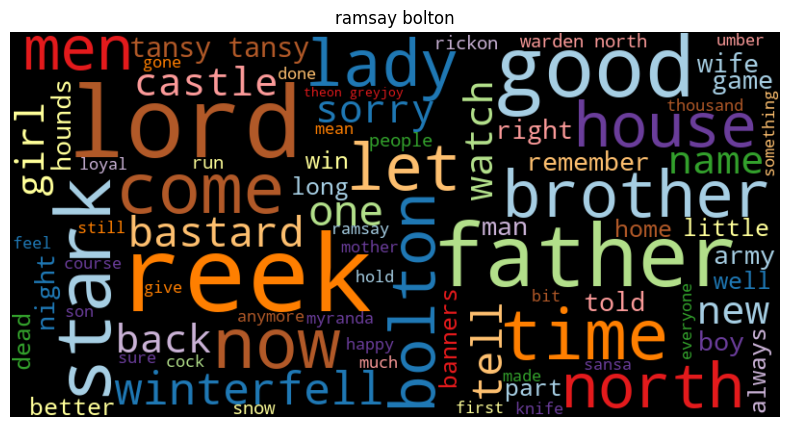

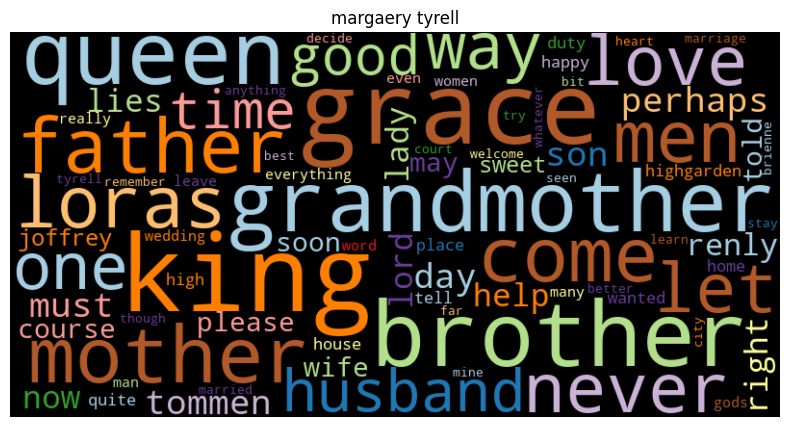

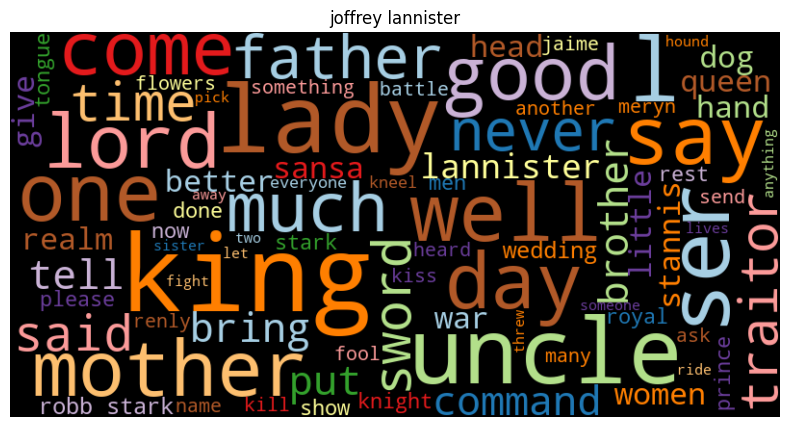

In [255]:


# get top 25 characters
top_20_names = dataframe['Name'].value_counts().head(25)



def create_wordcloud(name):
    text = dataframe[dataframe['Name'] == name]['Sentence'].str.cat(sep=' ')
    # remove from the text words_to_remove
    text = ' '.join([word for word in text.split() if word not in words_to_remove])
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, max_words= 80, colormap = 'Paired').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(name)
    plt.show()

for name in top_20_names.index:
    create_wordcloud(name)